In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read the dataset to the python environment.

In [53]:
data=pd.read_excel('iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
data.shape

(150, 5)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [56]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [57]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [58]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2. Do necessary pre-processing steps

In [59]:
# check for null values values
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [60]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [61]:
#filling missing values using median
for i in ['SL','SW','PL']:
    data[i]=data[i].fillna(data[i].median())

In [62]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Checking for outliers and Handling outliers

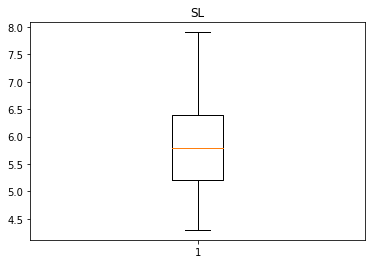

In [63]:
plt.boxplot(data['SL'])
plt.title('SL')
plt.show()

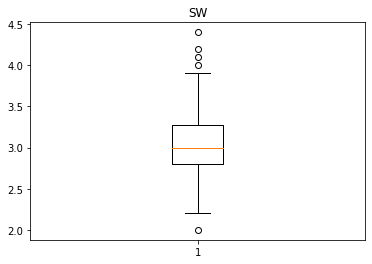

In [64]:
plt.boxplot(data['SW'])
plt.title('SW')
plt.show()

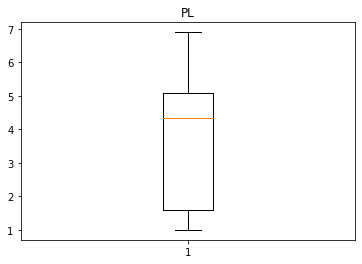

In [65]:
plt.boxplot(data['PL'])
plt.title('PL')
plt.show()

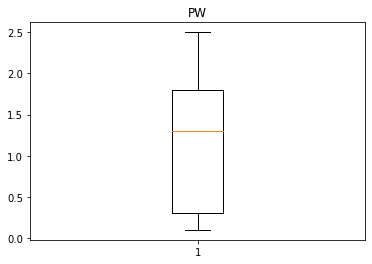

In [66]:
plt.boxplot(data['PW'])
plt.title('PW')
plt.show()

SW contain outliers

In [67]:
# Removing outliers
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1)
print(Q3)

2.8
3.25


In [68]:
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
print(lower)
print(upper)

2.1249999999999996
3.9250000000000003


Remove all value less than 2.12499 and greater that 3.9250

In [69]:
outlier=[]
for x in data['SW']:
    if((x>upper) or(x<lower)):
        outlier.append(x)
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [70]:
#finding index of these outliers
ind1=((data['SW']>upper)|(data['SW']<lower))
data.loc[ind1].index

Int64Index([14, 15, 32, 33, 60], dtype='int64')

In [71]:
''' Removing the Outliers '''
data.drop([14, 15, 32, 33, 60],inplace=True)

In [72]:
data.shape

(145, 5)

# Correlation Matrix

In [73]:
data.corr()

,SL,SW,PL,PW
SL,1.000000,-0.102874,0.843357,0.809185
SW,-0.102874,1.000000,-0.362630,-0.294115
PL,0.843357,-0.362630,1.000000,0.933262
PW,0.809185,-0.294115,0.933262,1.000000


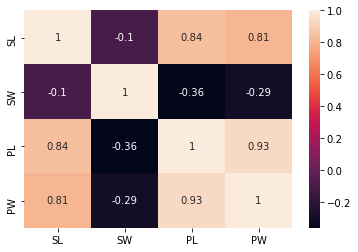

In [74]:
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.show()

PW have high correlation with SL & PL

PL have high correlatio with SL

We only have 4 variables so we don't need to neglect any of it

# Label Encoding

In [75]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [76]:
data['Classification']=label.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [77]:
data["Classification"].unique()

array([0, 1, 2])

# Min Max scaling

In [78]:
y=data['Classification']
x=data.drop(['Classification'],axis=1)

In [79]:
x.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897
std,0.816827,0.374354,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [80]:
# Min Max scaling
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler(feature_range=(0,1)) #(0,1) is desired range
x= min_max.fit_transform(x)
x=pd.DataFrame(x)
x.columns=['SL','SW','PL','PW']
x.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,0.435441,0.484381,0.482642,0.469540
std,0.226896,0.220208,0.290214,0.315925
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.352941,0.101695,0.083333
50%,0.416667,0.470588,0.567797,0.500000
75%,0.583333,0.588235,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

# Logistic Regression

In [81]:
#spliting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [82]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [83]:
y_pred=model.predict(x_test)

In [84]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [85]:
print('accuracy is: ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred,average='macro'))
print('recall is : ',recall_score(y_test,y_pred,average='macro'))
print('fi score is : ',f1_score(y_test,y_pred,average='macro'))

accuracy is:  0.9318181818181818
precision is :  0.9351851851851851
recall is :  0.9291101055806937
fi score is :  0.9314285714285714


In [86]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 11,  2],
       [ 0,  1, 16]], dtype=int64)

The Model have an accuracy of 93.18%

There are 3 misclassifications

# KNN Model

In [87]:
from sklearn.neighbors import KNeighborsClassifier
#find optimum k- value.We have to create model with varied k values
acc_values=[]
neighbors=np.arange(3,15) #taking values 3 to 15 into a variable

#loop to ceate KNN model for each k-value
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')#instance of KNN to variable
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    #append accuracy values to acc_values to find out the maximum accuracy
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [88]:
acc_values

[0.9772727272727273,
 0.9772727272727273,
 0.9772727272727273,
 0.9772727272727273,
 0.9772727272727273,
 0.9772727272727273,
 0.9772727272727273,
 0.9772727272727273,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546,
 0.9545454545454546]

Text(0, 0.5, 'Accuracy')

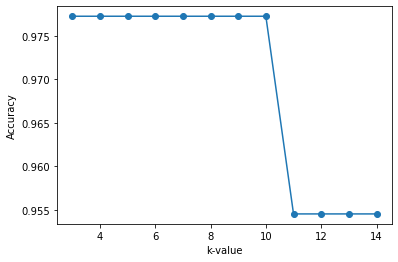

In [89]:
#find correspomd k value corresponding to highest accuracy
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k-value')
plt.ylabel('Accuracy')

In [90]:
#Make a model with k as 3
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski')#instance of KNN to variable
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [91]:
#check model performance
print('accuracy is: ',accuracy_score(y_test,y_pred))
print('precision is : ',precision_score(y_test,y_pred,average='macro'))
print('recall is : ',recall_score(y_test,y_pred,average='macro'))
print('fi score is : ',f1_score(y_test,y_pred,average='macro'))

accuracy is:  0.9772727272727273
precision is :  0.9814814814814815
recall is :  0.9743589743589745
fi score is :  0.9771428571428572


In [92]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 17]], dtype=int64)

# Decision tree Classifier

In [93]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred=dt.predict(x_test)
print('Accuracy on decision Tree model is : ',accuracy_score(y_test,y_pred))

Accuracy on decision Tree model is :  0.9545454545454546


In [94]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 16]], dtype=int64)

# SVM

# Linear SVM

In [95]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

In [96]:
print('Accuracy on linear SVM is : ',accuracy_score(y_test,y_pred)*100,'%')

Accuracy on linear SVM is :  97.72727272727273 %


# Polynomial SVM

In [97]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [98]:
print('Accuracy on polinomial SVM is : ',accuracy_score(y_test,y_pred)*100,'%')

Accuracy on polinomial SVM is :  93.18181818181817 %


# Radial SVM

In [99]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_test,y_test)
y_pred=svm_radial.predict(x_test)

In [100]:
print('Accuracy on radial SVM is : ',accuracy_score(y_test,y_pred)*100,'%')

Accuracy on radial SVM is :  100.0 %


# Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [106]:
print('Accuracy on Random Forest is : ',accuracy_score(y_test,y_pred)*100,'%')

Accuracy on Random Forest is :  95.45454545454545 %


# Inference: Radial SVM model gave the highest accuracy of 100%